In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
data_cleaned = pd.read_csv('data_cleaned.csv')
data_cleaned.head()

,category_id,comments_disabled,ratings_disabled,video_error_or_removed,region,timetotrend,hour,tag_counts,log_views,log_likes,log_dislikes,log_comments
0,28,0,0,0,Great Britan,7,16,14,13.407891,8.777247,6.570883,7.822845
1,25,0,0,0,Great Britan,7,17,44,10.871175,6.912743,3.931826,4.882802
2,22,0,0,0,Great Britan,12,20,6,12.983917,8.515992,5.204007,5.278115
3,22,0,0,0,Great Britan,3,7,27,13.478176,8.599326,7.863651,8.277158
4,22,0,0,0,Great Britan,8,16,16,10.732607,7.580700,3.555348,4.859812


In [3]:
#All distinct regions
countries = data_cleaned['region'].unique()
countries 

array(['Great Britan', 'India', 'Russia', 'Mexico', 'Japan',
       'United States', 'France', 'Denmark', 'South Korea', 'Canada'],
      dtype=object)

In [6]:
config = [ [50,50] , [60,40], [70,30], [80,20] , [90,10] ]
attribute = ['log_views' , 'log_likes' , 'log_dislikes' , 'log_comments']

In [5]:
from sklearn import metrics

In [21]:
MAE =[]
MSE = []
RMSE = []
mean_absolute = []
mean_squared = []
root_mean_squared = []

In [22]:
def config_test(c,attribute):
    testsize = c/100
    
    #Dummy variables for region
    data_config = pd.get_dummies(data_cleaned, drop_first=True)
    
    #Initializing data
    targets = data_config[attribute]
    inputs = data_config.drop([attribute],axis=1)
    
    #Scaling
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(inputs)
    inputs_scaled = scaler.transform(inputs)
    
    #TrainTestSplit
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=c, random_state=365)
    
    # Create a linear regression object
    reg = LinearRegression()
    # Fit the regression with the scaled TRAIN inputs and targets
    reg.fit( x_train,y_train)
    
    predicted = reg.predict(x_test)
      
    mean_absolute.append( metrics.mean_absolute_error(y_test, predicted))
    mean_squared.append(metrics.mean_squared_error(y_test, predicted))
    root_mean_squared.append(np.sqrt(metrics.mean_squared_error(y_test,predicted)))



for j in attribute:
    mean_absolute = []
    mean_squared = []
    root_mean_squared = []
    
    for i in config:
        config_test(i[1],j)
    MAE.append(mean_absolute)
    MSE.append(mean_squared)
    RMSE.append(root_mean_squared)

# Comparison of Mean Absolute Error

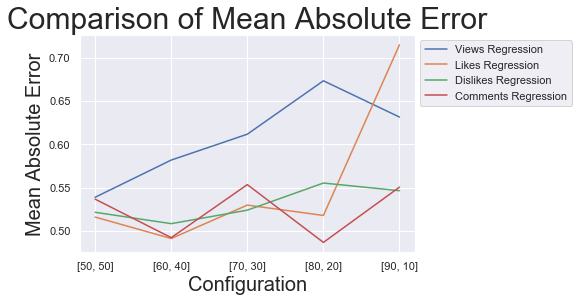

In [26]:
K = [1,2,3,4,5]
plt.plot(K,MAE[0],label="Views Regression")
plt.plot(K,MAE[1],label = "Likes Regression")
plt.plot(K,MAE[2],label="Dislikes Regression")
plt.plot(K,MAE[3],label="Comments Regression")
plt.xlabel('Configuration' , fontsize=20)
plt.ylabel('Mean Absolute Error',fontsize=20)
plt.title('Comparison of Mean Absolute Error',fontsize=30)
plt.xticks(K,config)

plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

# Comparison of Mean Squared Error

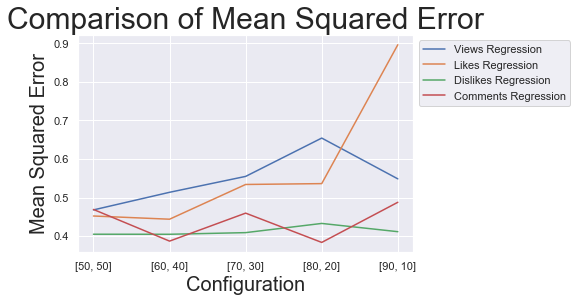

In [30]:
K = [1,2,3,4,5]
plt.plot(K,MSE[0],label="Views Regression")
plt.plot(K,MSE[1],label = "Likes Regression")
plt.plot(K,MSE[2],label="Dislikes Regression")
plt.plot(K,MSE[3],label="Comments Regression")
plt.xlabel('Configuration' , fontsize=20)
plt.ylabel('Mean Squared Error',fontsize=20)
plt.title('Comparison of Mean Squared Error',fontsize=30)
plt.xticks(K,config)

plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

# Comparison of Root Mean Squared Error

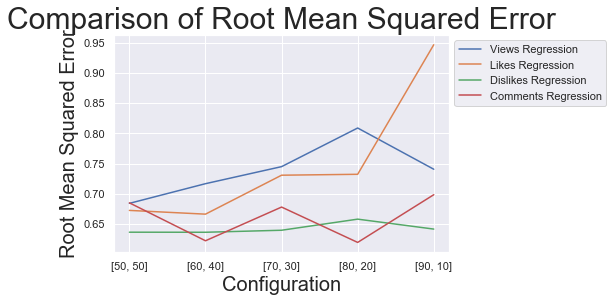

In [29]:
K = [1,2,3,4,5]
plt.plot(K,RMSE[0],label="Views Regression")
plt.plot(K,RMSE[1],label = "Likes Regression")
plt.plot(K,RMSE[2],label="Dislikes Regression")
plt.plot(K,RMSE[3],label="Comments Regression")
plt.xlabel('Configuration' , fontsize=20)
plt.ylabel('Root Mean Squared Error',fontsize=20)
plt.title('Comparison of Root Mean Squared Error',fontsize=30)
plt.xticks(K,config)

plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()